<a href="https://colab.research.google.com/github/RaulBus01/Euro2024PenaltyData/blob/main/Euro2024PenaltyData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Description
The Euro2024PenaltyData project is a data mining and analysis initiative focused on understanding and predicting penalty kick performance for players participating in the UEFA Euro 2024 tournament. The project involves the collection, cleaning, analysis, and modeling of data to gain insights into penalty trends, conversion rates, and shooting patterns, as well as to predict future outcomes.

In [ ]:
!pip install wikipedia --quiet
!pip install scikit-learn --quiet

  Preparing metadata (setup.py) ... done


### WebScrapping from Wikipedia

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re

url = 'https://en.wikipedia.org/wiki/UEFA_Euro_2024_squads' # URL from Wikipedia
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}
session = requests.Session()
response = session.get(url, headers=headers)

soup = BeautifulSoup(response.content, 'html.parser')
tables = soup.find_all('table', class_='wikitable')

data = []
teams = [
      'GER', 'SCO', 'HUN', 'SUI',
      'ESP', 'CRO', 'ITA', 'ALB',
      'SVN', 'DEN', 'SRB', 'ENG',
      'POL', 'NED', 'AUT', 'FRA',
      'BEL', 'SVK', 'ROU', 'UKR',
      'TUR', 'GEO', 'POR', 'CZH'
]
for index, table in enumerate(tables[:24]):
    rows = table.find_all('tr');
    nation = teams[index];
    for row in rows[1:]:
        cells = row.find_all(['td', 'th'])

        player_number = cells[0].text.strip()
        position = cells[1].find('a').text.strip()
        player_name = cells[2].text.replace(' (captain)','').strip()
        age_text = cells[3].text.strip()
        age_match = re.search(r'\(aged (\d+)\)', age_text)
        age =  age = age_match.group(1)
        caps = cells[4].text.strip()
        goals = cells[5].text.strip()
        club = cells[6].text.strip()

        data.append([player_number,nation, position, player_name, age, caps, goals, club])

squads_df = pd.DataFrame(data, columns=['Number','Nationality','Position', 'Player Name', 'Age', 'Caps', 'Goals', 'Club'])
# print(df.head())
squads_df.to_csv('euro_2024_squads.csv', index=False)


### Selenium Code for obtaining player id from Sofascore (It's not working on colab)

In [ ]:
# import time
# import csv
# from selenium import webdriver
# from selenium.webdriver import Keys
# from selenium.webdriver.common.by import By
# from selenium.webdriver.chrome.options import Options
# from selenium.webdriver.support.ui import WebDriverWait
# from selenium.webdriver.support import expected_conditions as EC
# from selenium.common.exceptions import NoSuchElementException, TimeoutException

# options = Options()
# options.add_experimental_option("detach", True)
# options.add_argument('--window-size=1200,1080')
# driver = webdriver.Chrome(options=options)
# driver.get('https://www.sofascore.ro/ro/')

# def handle_cookie_consent():
#     try:
#         accept_button = WebDriverWait(driver, 10).until(
#             EC.element_to_be_clickable((By.XPATH, '/html/body/div[4]/div[2]/div[1]/div[2]/div[2]/button[1]/p'))
#         )
#         accept_button.click()
#         time.sleep(2)
#         return True
#     except Exception as e:
#         print(f"Error handling cookie consent: {e}")
#         return False

# def enter_player_name(player_name, writer):
#     try:
#         input_field = WebDriverWait(driver, 10).until(
#             EC.visibility_of_element_located((By.XPATH, '/html/body/div[1]/header/div[1]/div/div/div[2]/div/form/input'))
#         )

#         # Clear the input field using JavaScript
#         driver.execute_script("arguments[0].value = '';", input_field)
#         time.sleep(1)  # Wait to ensure the input field is cleared

#         # Enter the player name
#         input_field.send_keys(player_name)
#         time.sleep(2)  # Wait for the input to be processed and results to load

#         # Wait for the first result to appear and click on it
#         first_result = WebDriverWait(driver, 8).until(
#             EC.element_to_be_clickable(
#                 (By.XPATH, '/html/body/div[1]/header/div[1]/div/div/div[2]/div/div/div[2]/div[1]/div/div[1]/a'))
#         )
#         href = first_result.get_attribute('href')
#         player_code = href.split('/')[-1]

#         # Write player name and code to CSV
#         writer.writerow([player_name, player_code])
#         time.sleep(1)  # Wait before clearing the input field

#     except NoSuchElementException as e:
#         print(f"Element not found: {e}")
#     except TimeoutException as e:
#         print(f"Timeout waiting for element: {e}")
#     except Exception as e:
#         print(f"Error entering player name: {e}")

# def get_player_names_from_csv(csv_file):
#     players = []
#     try:
#         with open(csv_file, 'r', encoding='utf-8') as file:
#             reader = csv.reader(file)
#             for row in reader:
#                 if row and len(row) > 2 and row[2] != 'Player':
#                     players.append(row[2].strip())
#     except Exception as e:
#         print(f"Error reading CSV file: {e}")
#     return players

# if __name__ == "__main__":
#     if not handle_cookie_consent():
#         print("Failed to handle cookie consent.")

#     csv_file = 'euro_2024_squads.csv'
#     player_names = get_player_names_from_csv(csv_file)

#     with open('player_codes.csv', 'w', newline='', encoding='utf-8') as file:
#         writer = csv.writer(file)
#         writer.writerow(['Player Name', 'Player Code'])  # Write the header

#         for player_name in player_names:
#             enter_player_name(player_name, writer)

#     driver.quit()


### WebScrapping from SofaScore API




In [ ]:
import pandas as pd
import requests

players_api = pd.read_csv('player_codes.csv', encoding='utf-8')

results = pd.DataFrame(columns=['Player Name', 'Player Code', 'Tournament', 'Outcome', 'Zone', 'X', 'Y'])

base_url = 'https://www.sofascore.com/api/v1/player/'




for index, row in players_api.iterrows():
  player_name = row['Player Name']
  player_code = row['Player Code']
  api_url = f"{base_url}{player_code}/penalty-history"
  payload = ""
  headers = {}

  try:
    response = requests.get(api_url, headers=headers, data=payload)
    response.raise_for_status()  # Raise an error for bad status codes

    penalty_data = response.json()


    penalty_scored = penalty_data.get('scored', pd.NA) #
    penalty_attempts = penalty_data.get('attempts', pd.NA)

    if 'penalties' in penalty_data: # Check if penalties are in penalty_data
        for penalty in penalty_data['penalties']:
            event = penalty.get('event', {})
            tournament = event.get('tournament', {}).get('name', pd.NA)  # Use pd.NA for NaN
            outcome = penalty.get('outcome', pd.NA)  # Use pd.NA for NaN
            zone = penalty.get('zone', pd.NA)  # Use pd.NA for NaN
            api_id = penalty.get('id', pd.NA)
            x = penalty.get('x', pd.NA)  # Use pd.NA for NaN
            y = penalty.get('y', pd.NA)  # Use pd.NA for NaN

            results = pd.concat([results, pd.DataFrame({
                'Player Name': [player_name],
                'Player Code': [player_code],
                'Tournament': [tournament],
                'api_id': [api_id],
                'Outcome': [outcome],
                'Zone': [zone],
                'X': [x],
                'Y': [y],
                'Scored': [penalty_scored],
                'Attempts': [penalty_attempts]
            })], ignore_index=True)

    else:
        results = pd.concat([results, pd.DataFrame({
            'Player Name': [player_name],
            'Player Code': [player_code],
            'Tournament': [pd.NA],
            'api_id': [pd.NA],
            'Outcome': ['No Data'],
            'Zone': [pd.NA],
            'X': [pd.NA],
            'Y': [pd.NA],
            'Scored': [penalty_scored],
            'Attempts': [penalty_attempts]
        })], ignore_index=True)

  except requests.exceptions.RequestException as e:

    results = pd.concat([results, pd.DataFrame({
        'Player Name': [player_name],
        'Player Code': [player_code],
        'Tournament': [pd.NA],
        'api_id': [pd.NA],
        'Outcome': ['Not Available'],
        'Zone': [pd.NA],
        'X': [pd.NA],
        'Y': [pd.NA],
        'Scored': [pd.NA],
        'Attempts': [pd.NA]
    })], ignore_index=True)


results.to_csv('penalty_data.csv', index=False)


### Data Cleaning and Processing


In [ ]:
merged_df = pd.merge(results,squads_df,on='Player Name',how='left')

merged_df.dropna(inplace=True)
zones={
    "low-left":1,
    "low-centre":2,
    "low-right":3,
    "left":4,
    "right":5,
    "high-left":6,
    "high-centre":7,
    "high-right":8,
    "close-left":9,
    "close-high-left":10,
    "close-high":11,
    "high":11,
    "close-high-right":12,
    "close-right":13
}
outcomes={
    "miss":0,
    "goal":1,
    "save":2,
    "post":3
}
positions={
    "GK":0,
    "DF":1,
    "MF":2,
    "FW":3
}

merged_df['Zone'] = merged_df['Zone'].map(zones)
merged_df['Outcome'] = merged_df['Outcome'].map(outcomes)
merged_df['Position'] = merged_df['Position'].map(positions)
merged_df.to_csv('euro_players_penalty_data.csv', index=False)
merged_df

,Player Name,Player Code,Tournament,Outcome,Zone,X,Y,api_id,Scored,Attempts,Number,Nationality,Position,Age,Caps,Goals,Club
1,Antonio Rüdiger,142622,"UEFA Champions League, Knockout stage",1,1,27.96,93.67,6061058,3,3,2,GER,1,31,69,3,Real Madrid
2,Antonio Rüdiger,142622,EFL Cup,1,7,56.45,63.00,26417,3,3,2,GER,1,31,69,3,Real Madrid
3,Antonio Rüdiger,142622,UEFA Super Cup,1,2,40.32,77.83,26418,3,3,2,GER,1,31,69,3,Real Madrid
4,David Raum,856076,DFB Pokal,1,1,37.63,69.33,10121,1,1,3,GER,1,26,21,0,RB Leipzig
6,Pascal Groß,48480,Premier League,1,1,32.80,82.00,6041583,13,17,5,GER,2,32,7,1,Brighton & Hove Albion
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3173,Tomáš Souček,799041,"UEFA Europa League, Knockout stage",1,7,41.40,43.00,6044253,3,4,22,CZH,2,29,69,12,West Ham United
3176,Pavel Šulc,957604,"1. Liga, Championship",1,3,70.97,86.33,6062042,4,4,25,CZH,2,23,3,0,Viktoria Plzeň
3177,Pavel Šulc,957604,"UEFA Europa Conference League, Knockout stage",1,1,28.49,72.50,6058293,4,4,25,CZH,2,23,3,0,Viktoria Plzeň
3178,Pavel Šulc,957604,1. Liga,1,1,27.42,96.83,556219,4,4,25,CZH,2,23,3,0,Viktoria Plzeň


### Draw Ploat for Player Statistics


<ipython-input-317-bc88a77ab50e>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=y_column, x='Conversion Rate', data=dataframe, palette="mako")


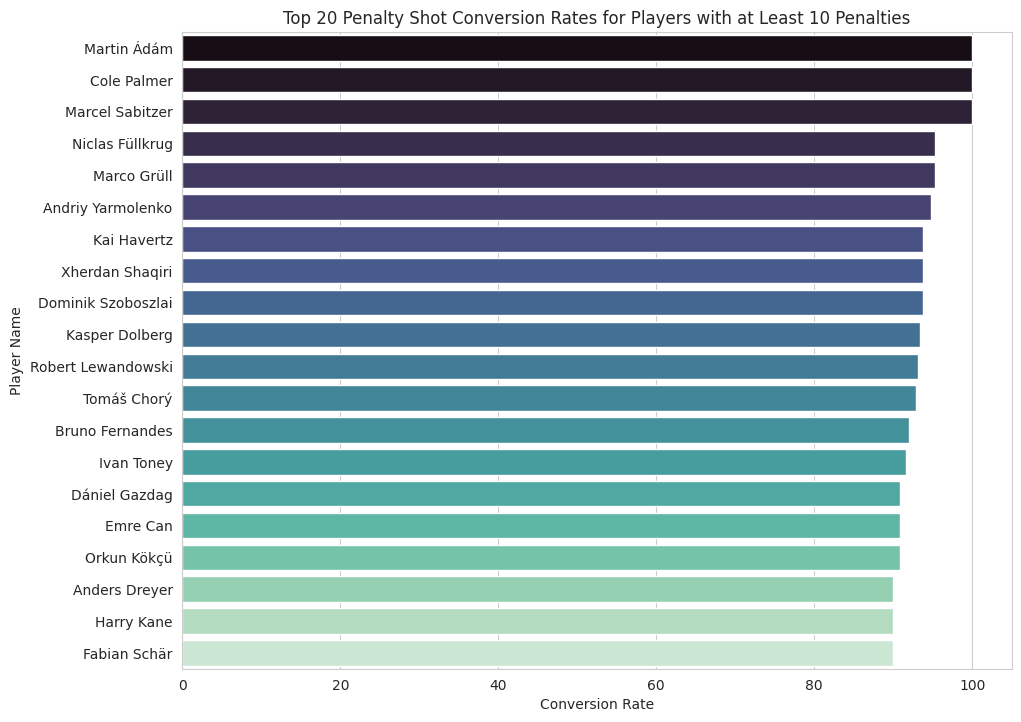

In [ ]:
import seaborn as sns



import pandas as pd

def calculate_players_conversion_rate(merged_df):
    conversion_rates = []
    unique_players_df = merged_df.drop_duplicates(subset=['Player Name'])


    for index, row in unique_players_df.iterrows():
        player_name = row['Player Name']
        penalty_scored = row['Scored']
        penalty_attempts = row['Attempts']
        if penalty_attempts >= 10:
            conversion_rate = penalty_scored / penalty_attempts
            conversion_rates.append({
                'Player Name': player_name,
                'Penalty Scored': penalty_scored,
                'Penalty Attempts': penalty_attempts,
                'Conversion Rate': conversion_rate*100
            })


    conversion_rates_df = pd.DataFrame(conversion_rates)

    return conversion_rates_df


conversion_players_rates_df = calculate_players_conversion_rate(merged_df)

def draw_conversion_rate_plot(dataframe, title, plot_by_player=True):
    y_column = 'Player Name' if plot_by_player else 'Nation'
    sns.barplot(y=y_column, x='Conversion Rate', data=dataframe, palette="mako")
    plt.title(title)
    plt.xlabel('Conversion Rate')
    plt.ylabel('Player Name' if plot_by_player else 'Nation')
    plt.show()

top_20_highest_conversion_rates_players_df = conversion_players_rates_df.sort_values('Conversion Rate', ascending=False).head(20)

draw_conversion_rate_plot(top_20_highest_conversion_rates_players_df,'Top 20 Penalty Shot Conversion Rates for Players with at Least 10 Penalties',True)

<ipython-input-273-4770f2fcca9a>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=y_column, x='Conversion Rate', data=dataframe, palette="mako")


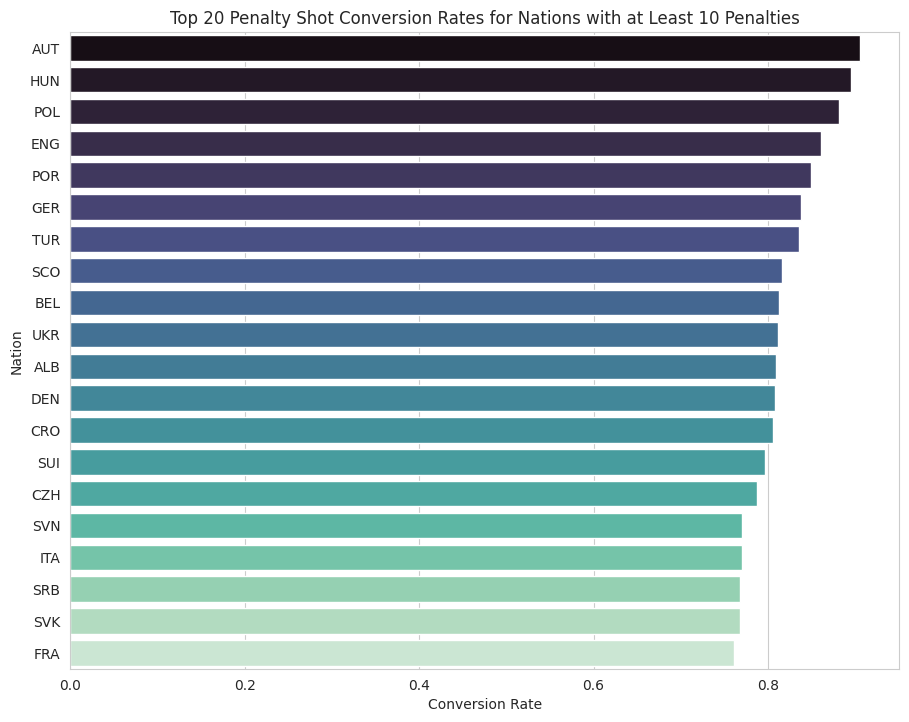

In [ ]:
def calculate_nations_conversion_rate(merged_df):
    conversion_rates = []


    unique_players_df = merged_df.drop_duplicates(subset=['Player Name'])

    aggregated_df = unique_players_df.groupby(['Nationality', 'Player Name'], as_index=False).agg({
        'Scored': 'sum',
        'Attempts': 'sum'
    })
    nation_aggregated_df = aggregated_df.groupby('Nationality', as_index=False).agg({
            'Scored': 'sum',
            'Attempts': 'sum'
    })

    for index, row in nation_aggregated_df.iterrows():
        nation_name = row['Nationality']
        penalty_scored = row['Scored']
        penalty_attempts = row['Attempts']
        if penalty_attempts >= 10:
            conversion_rate = penalty_scored / penalty_attempts
            conversion_rates.append({
                'Nation': nation_name,
                'Penalty Scored': penalty_scored,
                'Penalty Attempts': penalty_attempts,
                'Conversion Rate': conversion_rate
            })


    conversion_rates_df = pd.DataFrame(conversion_rates)

    return conversion_rates_df

conversion_nation_rates_df = calculate_nations_conversion_rate(merged_df)
top_20_highest_conversion_rates_nations_df = conversion_nation_rates_df.sort_values('Conversion Rate', ascending=False).head(20)
draw_conversion_rate_plot(top_20_highest_conversion_rates_nations_df,'Top 20 Penalty Shot Conversion Rates for Nations with at Least 10 Penalties',False)

<ipython-input-324-36ee516fdfdc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Nationality', x='Attempts', data=dataframe, palette="mako")


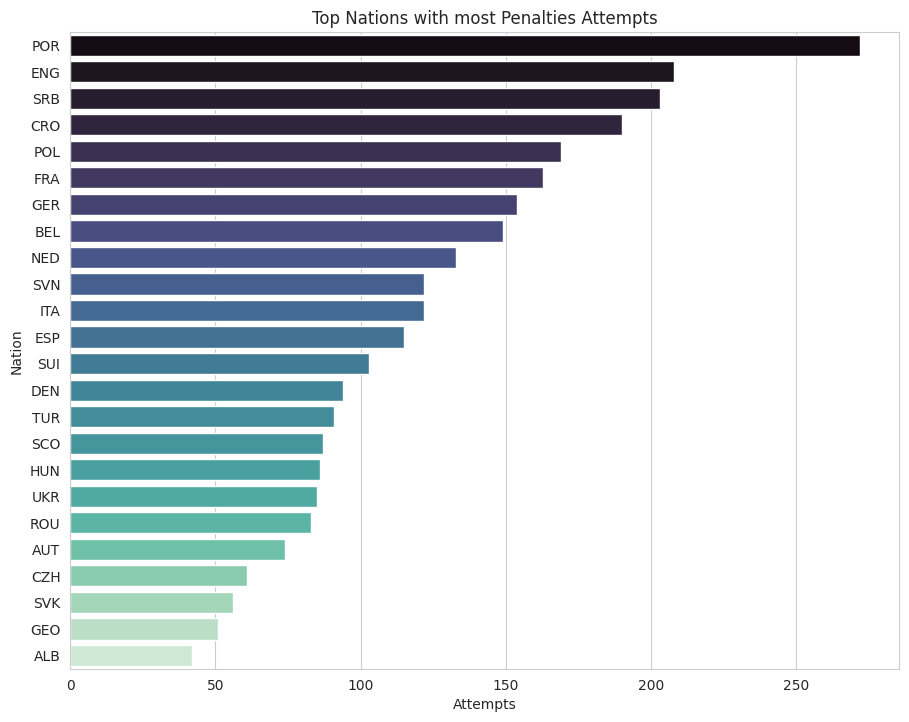

In [ ]:
def draw_plot(dataframe, title, plot_by_player=True):

    sns.barplot(y='Nationality', x='Attempts', data=dataframe, palette="mako")
    plt.title(title)
    plt.xlabel('Attempts')
    plt.ylabel('Player Name' if plot_by_player else 'Nation')
    plt.show()

def calculate_nations_with_most_attempts(merged_df):
    conversion_rates = []

    unique_players_df = merged_df.drop_duplicates(subset=['Player Name']) # Filter the unique players

    aggregated_df = unique_players_df.groupby(['Nationality', 'Player Name'], as_index=False).agg({
        'Attempts': 'sum'
    })
    nation_aggregated_df = aggregated_df.groupby('Nationality', as_index=False).agg({
            'Attempts': 'sum'
    })

    nation_aggregated_df = nation_aggregated_df.sort_values(by='Attempts', ascending=False)

    return nation_aggregated_df
most_penaltties_attempts_nations_df = calculate_nations_with_most_attempts(merged_df)
draw_plot(most_penaltties_attempts_nations_df,'Top Nations with most Penalties Attempts',False)

### Draw Goal Plot


In [ ]:
from math import e
import matplotlib.pyplot as plt
import numpy as np
import cv2
from matplotlib.colors import Normalize

def draw_goal_plot(zones,title,colors):

  image = cv2.imread('Goal.png') # Read image
  zone_to_grid = {
        1: (3, 1),
        2: (3, 2),
        3: (3, 3),
        4: (2, 1),
        5: (2, 3),
        6: (1, 1),
        7: (1, 2),
        8: (1, 3),
        9: (3, 0),
        10: (0, 0),
        11: [(0, 2), (0, 1)], # Combine for high and close high zone
        12: (0, 4),
        13: (3, 4)

    }

  grid_values = {(i, j): 0 for i in range(4) for j in range(5)}
  for zone, value in zones.items():

        if zone in zone_to_grid:
            if zone == 11:  # Handle the special case for high and close-high
                for grid_pos in zone_to_grid[zone]:
                    grid_values[grid_pos] = value

            else:

                grid_values[zone_to_grid[zone]] = value
  # Combine cells (0,0) and (1,0) by moving the value of (1,0) to (0,0)

  if grid_values[(1, 0)] != 0:
      grid_values[(0, 0)] += grid_values[(1, 0)]
      grid_values[(1, 0)] = 0

  # Combine cells (2,0) and (3,0) by moving the value of (3,0) to (2,0)
  if grid_values[(2, 0)] != 0:
      grid_values[(3, 0)] += grid_values[(2, 0)]
      grid_values[(2, 0)] = 0

  # Combine cells (0,1), (0,2), and (0,3) by moving the values of (0,2) and (0,3) to (0,1)
  if grid_values[(0, 1)] != 0:
      if colors:
        grid_values[(0, 2)] = grid_values[(0, 1)]
        grid_values[(0, 1)] = 0
      else:
        grid_values[(0, 1)] = 0
  if grid_values[(0, 3)] != 0:
      grid_values[(0, 1)] += grid_values[(0, 3)]
      grid_values[(0, 3)] = 0

  # Plotting the new image with the values
  fig, ax = plt.subplots()
  ax.imshow(image)


  rows, cols = 4, 5

 #Plotting the lines for cells over the image
  for i in range(1, rows):
      if i not in {1, 3}:
          ax.axhline(y=i * image.shape[0] // rows, color='blue', linewidth=2)
  for j in range(1, cols):
      if j not in {2, 3}:
          ax.axvline(x=j * image.shape[1] // cols, color='blue', linewidth=2)


  ax.axhline(y=image.shape[0] // rows, xmin=1 / cols, xmax=4 / cols, color='blue', linewidth=2) # horizontal line
  ax.axhline(y=3* image.shape[0] // rows, xmin=1 / cols, xmax=4 / cols, color='blue', linewidth=2) # horizontal line

  ax.axvline(x=2 * image.shape[1] // cols, ymin=0 / rows, ymax=3 / rows, color='blue', linewidth=2) # vertical line
  ax.axvline(x=3 * image.shape[1] // cols, ymin=0 / rows, ymax=3 / rows, color='blue', linewidth=2) # vertical line


  filtered_dict = {key: value for key, value in grid_values.items() if not np.isnan(value)} # Filter the nan values

  norm = Normalize(vmin=min(filtered_dict.values()), vmax=max(filtered_dict.values())+1) # Normalize the values




  for (row, col), value in grid_values.items():

      color = cmap(norm(value)) # Get colormap based on normalized value

      if value > 0: #Check if value is greater than 0
          if (row, col) in {(0, 0), (2, 0)}:
              x = col * image.shape[1] // cols + image.shape[1] // (2 * cols)
              y = (row + 0.5) * image.shape[0] // rows
          elif (row, col) == (0, 1):
              x = col * image.shape[1] // cols + image.shape[1] // cols
              y = row * image.shape[0] // rows + image.shape[0] // (2 * rows)
          else:
              x = col * image.shape[1] // cols + image.shape[1] // (2 * cols)
              y = row * image.shape[0] // rows + image.shape[0] // (2 * rows)
          ax.text(x, y, str(value), color='white', fontsize=22, ha='center', va='center') # Set color for text

          if (row, col) in {(0, 1), (0, 3), (1, 0), (2, 0)}:
            rect = plt.Rectangle((col * image.shape[1] // cols, row * image.shape[0] // rows), # Add cell without color
                                  image.shape[1] // cols, image.shape[0] // rows,
                                  linewidth=1, edgecolor='black', facecolor='none')
          else:
            rect = plt.Rectangle((col * image.shape[1] // cols, row * image.shape[0] // rows), #Add cell with color
                                  image.shape[1] // cols, image.shape[0] // rows,
                                linewidth=1, edgecolor='black', facecolor=color)
      else:

       rect = plt.Rectangle((col * image.shape[1] // cols, row * image.shape[0] // rows),
                              image.shape[1] // cols, image.shape[0] // rows,
                              linewidth=1, edgecolor='black', facecolor='none') #Add cell without color
      if colors:
        ax.add_patch(rect)
  plt.axis('off')
  plt.title(title)
  plt.show()


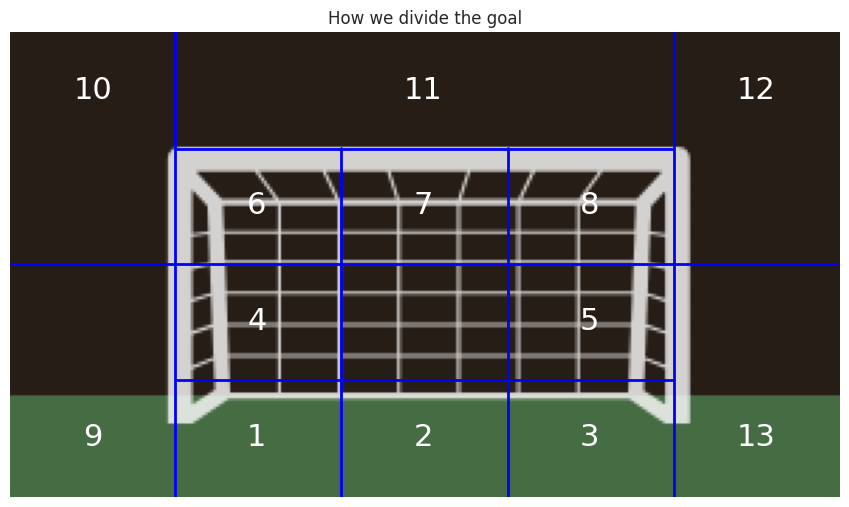

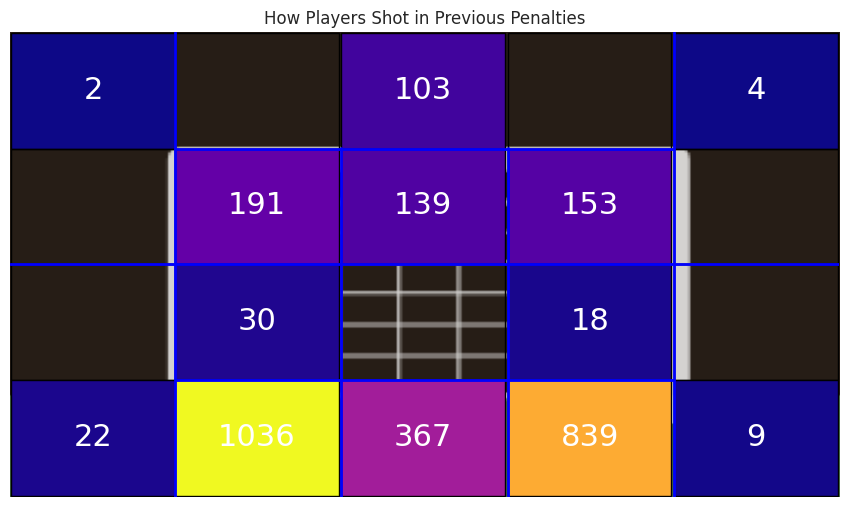

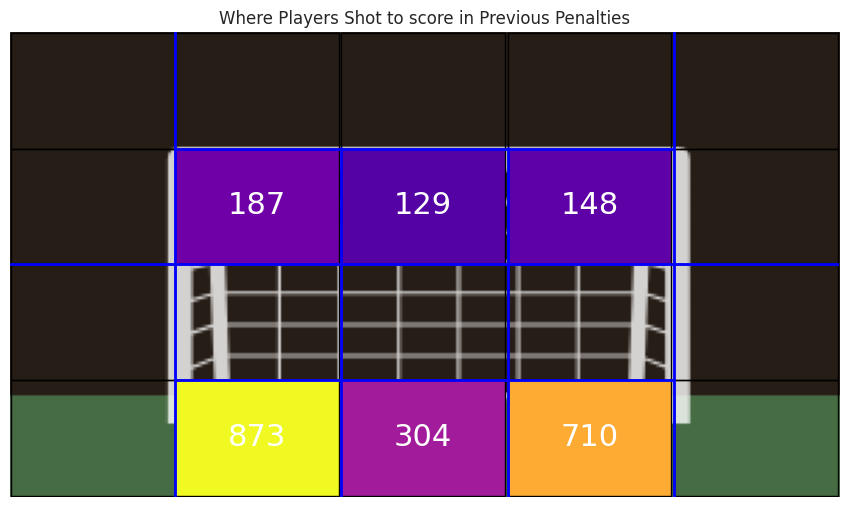

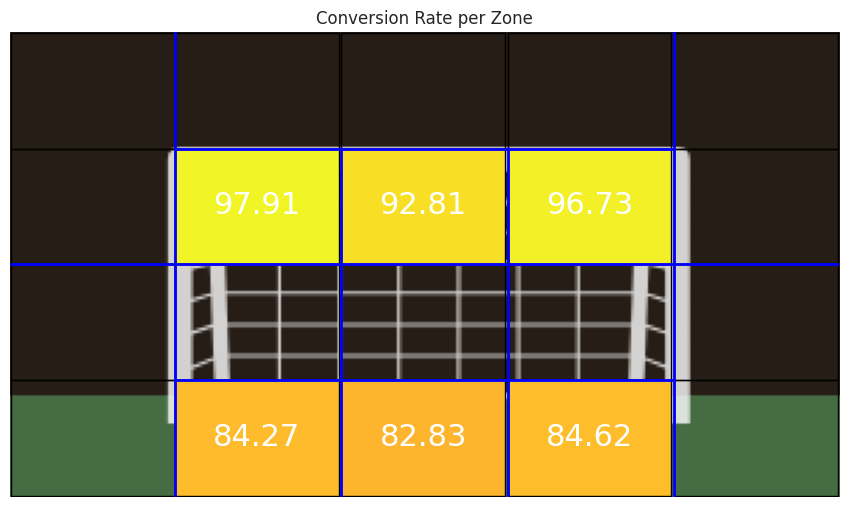

In [ ]:
zones_goal = merged_df[merged_df['Outcome']==1]['Zone'].value_counts() #Get the number of goals per zone
zone_counts = merged_df['Zone'].value_counts() # Get the number of zones
zone_conversion_rate = (zones_goal / zone_counts) * 100 # Calculate the conversion rate per zone




zone_conversion_rate = zone_conversion_rate.round(2)
#Mapping the zones
zones_mapped ={
        1: 1,
        2: 2,
        3: 3,
        4: 4,
        5: 5,
        6: 6,
        7: 7,
        8: 8,
        9: 9,
        10: 10,
        11: 11,
        12: 12,
        13: 13
}
cmap = plt.colormaps['plasma']
draw_goal_plot(zones_mapped,"How we divide the goal",None)
draw_goal_plot(zone_counts,"How Players Shot in Previous Penalties",cmap)
draw_goal_plot(zones_goal,"Where Players Shot to score in Previous Penalties",cmap)
draw_goal_plot(zone_conversion_rate,"Conversion Rate per Zone",cmap)



In [ ]:
merged_df

,Player Name,Player Code,Tournament,Outcome,Zone,X,Y,api_id,Scored,Attempts,Number,Nationality,Position,Age,Caps,Goals,Club
1,Antonio Rüdiger,142622,"UEFA Champions League, Knockout stage",1,1,27.96,93.67,6061058,3,3,2,GER,1,31,69,3,Real Madrid
2,Antonio Rüdiger,142622,EFL Cup,1,7,56.45,63.00,26417,3,3,2,GER,1,31,69,3,Real Madrid
3,Antonio Rüdiger,142622,UEFA Super Cup,1,2,40.32,77.83,26418,3,3,2,GER,1,31,69,3,Real Madrid
4,David Raum,856076,DFB Pokal,1,1,37.63,69.33,10121,1,1,3,GER,1,26,21,0,RB Leipzig
6,Pascal Groß,48480,Premier League,1,1,32.80,82.00,6041583,13,17,5,GER,2,32,7,1,Brighton & Hove Albion
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3173,Tomáš Souček,799041,"UEFA Europa League, Knockout stage",1,7,41.40,43.00,6044253,3,4,22,CZH,2,29,69,12,West Ham United
3176,Pavel Šulc,957604,"1. Liga, Championship",1,3,70.97,86.33,6062042,4,4,25,CZH,2,23,3,0,Viktoria Plzeň
3177,Pavel Šulc,957604,"UEFA Europa Conference League, Knockout stage",1,1,28.49,72.50,6058293,4,4,25,CZH,2,23,3,0,Viktoria Plzeň
3178,Pavel Šulc,957604,1. Liga,1,1,27.42,96.83,556219,4,4,25,CZH,2,23,3,0,Viktoria Plzeň


### Feature Importance - Random Forest



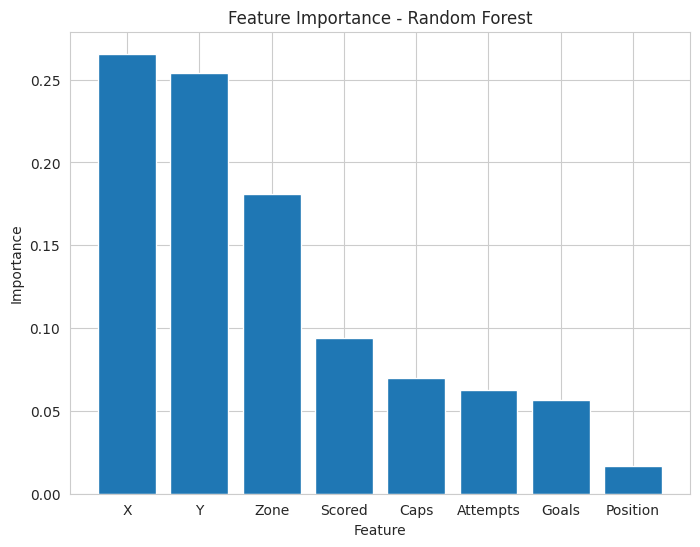

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
df = merged_df.copy()

X = df[['X', 'Y','Zone','Scored','Caps','Attempts','Goals','Position']].values # Filter relevant features
y = df['Outcome'].values  # Desired outcome prediction


model = RandomForestClassifier(random_state=12) # Init RandomForestClassifier
model.fit(X, y) # Train the model

feature_importances = model.feature_importances_ # Get the importance of each feature

#Plot features and their importance
plt.figure(figsize=(8, 6))
plt.bar(['X', 'Y','Zone','Scored','Caps','Attempts','Goals','Position'], feature_importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance - Random Forest')
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

def data_preprocess(df, nation=None, player_name=None):
    df = df.copy()  # Make a copy of given dataFrame

    if nation:
        df_filtered = df[df['Nationality'] == nation].copy()  #Make a copy of dataFrame with given nation
    else:
        df_filtered = df.copy()    # If nation is not provided, use the entire dataframe


    if player_name:
        df_filtered = df_filtered[df_filtered['Player Name'] == player_name].copy()  #Make a copy of dataFrame with given player name

    if df_filtered.empty:
        return "No data available for the given input." # Return if not existing paramter was given

    X = df_filtered[['X', 'Y', 'Outcome', 'Position', 'Goals', 'Caps','Scored','Attempts']]  # Filter important feautres for training
    y = df_filtered['Zone']   # What should be predicted

    return X, y

def model_train(X, y, model):


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0) # Dividee training data and test data

    #Scale the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    #Train given model
    model.fit(X_train_scaled, y_train)

    #Predit the actual class
    y_pred = model.predict(X_test_scaled)
    #Predict class probability
    y_pred_prob = model.predict_proba(X_test_scaled)
    #Obtain the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)

    return {
        "model": model,
        "accuracy": accuracy,
        "y_pred_prob": y_pred_prob
    }

def test_model(df, nation=None, player_name=None, model=None):

    data = data_preprocess(df, nation, player_name) #Obtain the feauters and the wanted outcome

    if isinstance(data, str): #Check if data preprocessing failed
        return data

    X, y = data
    result = model_train(X, y, model) # Train model function
    if 'y_pred_prob' in result: # Check if result have prediction probability
        y_pred_prob = result['y_pred_prob']
        zones = np.unique(y) # Filter just unique zones
        zones_prediction = {} # Dictionary for storing zone prediction
        for i, zone in enumerate(zones):
            zones_prediction[zone]=round(y_pred_prob[:,i-1].mean() * 100,2)
    if nation and player_name:
        title = f"{type(model).__name__} Prediction for {nation} - {player_name} Penalties"
    elif nation:
        title = f"{type(model).__name__} Prediction for {nation} Penalties"
    elif player_name:
        title = f"{type(model).__name__} Prediction for {player_name} Penalties"
    else:
        title = f"{type(model).__name__} Prediction"
    draw_goal_plot(zones_prediction, title, cmap) # Draw goal plot
    return result

def plot_accuracies(accuracy_list,title):
  sns.set_style("whitegrid")
  plt.figure(figsize=(16,5))
  plt.yticks(np.arange(0,100,10))
  plt.ylabel("Accuracy %")
  plt.xlabel("Algorithms")
  plt.title(title)
  sns.barplot(x=list(accuracy_list.keys()), y=list(accuracy_list.values()),palette='Spectral')
  plt.show()

df = pd.read_csv('euro_players_penalty_data.csv')

models = {
    'KNeighborsClassifier': KNeighborsClassifier(2),
    'SVM': SVC(kernel='linear', probability=True,random_state=1),
    'GaussianNB': GaussianNB(),
    'RandomForestClassifier': RandomForestClassifier(n_estimators=1000, random_state=1)
}
def test_models(nation=None,player_name=None):
  accuracies = {}
  scoreList = []
  for model_name, model_instance in models.items():
      result = test_model(df,nation,player_name,model=model_instance)

      accuracies[model_name]=result['accuracy']*100

  return accuracies


### Model Accuracies on entire data



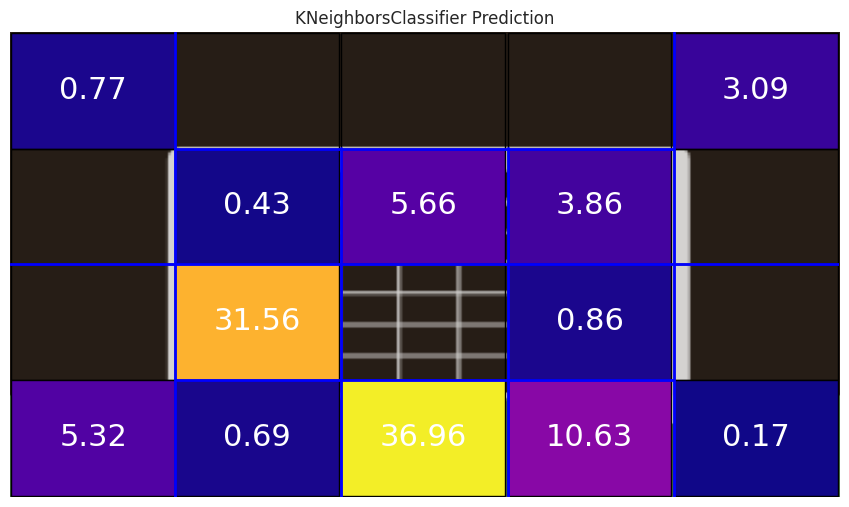

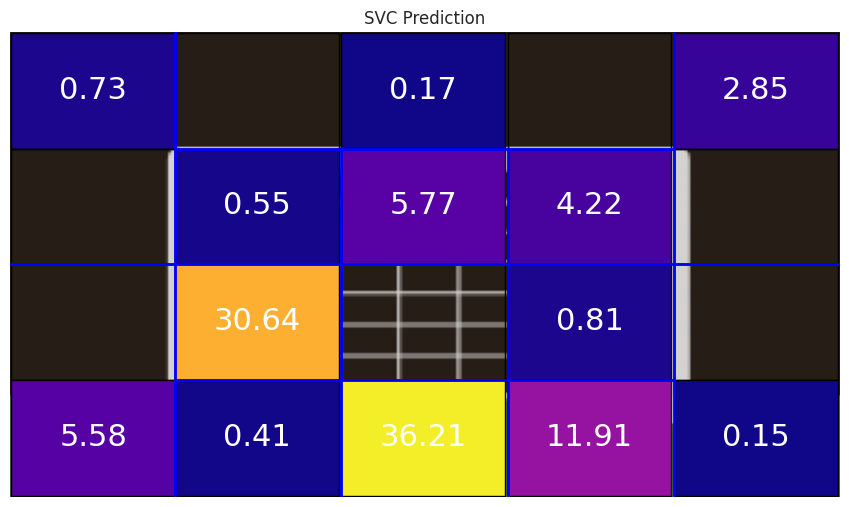

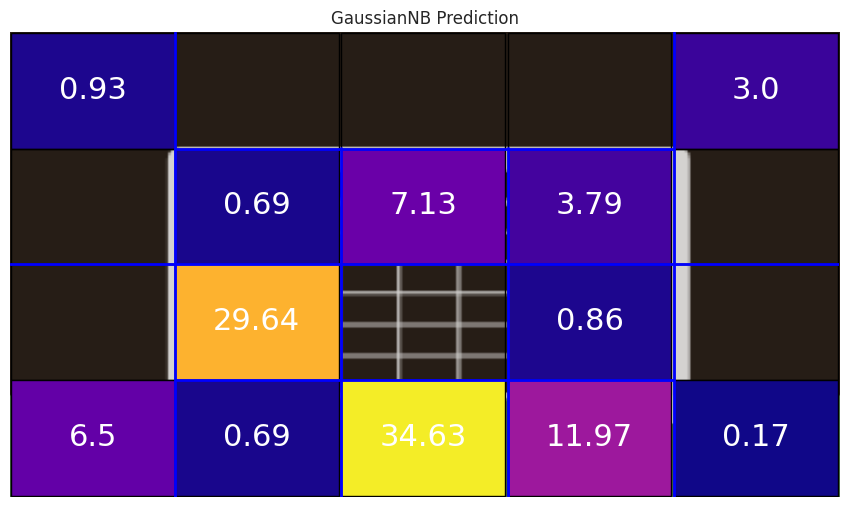

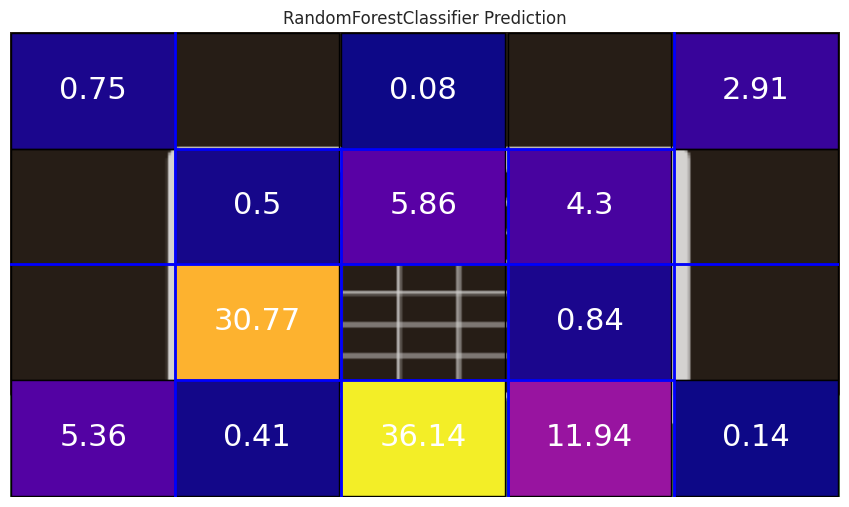

<ipython-input-410-56ed2b42de7a>:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(accuracy_list.keys()), y=list(accuracy_list.values()),palette='Spectral')


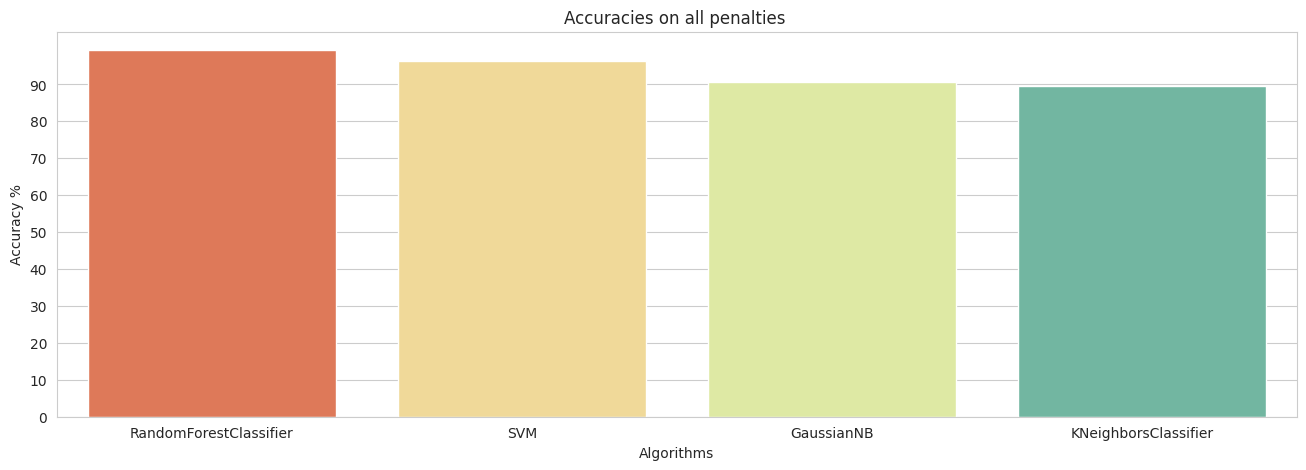

{'RandomForestClassifier': 99.31389365351629, 'SVM': 96.22641509433963, 'GaussianNB': 90.73756432246999, 'KNeighborsClassifier': 89.70840480274443}


In [ ]:
accuracies_on_data = test_models() # Test Model on entire dataset

sorted_accuracies = dict(sorted(accuracies_on_data.items(), key=lambda x: x[1], reverse=True)) # Sorting in ascending order the accuracies of models
title = 'Accuracies on all penalties '
plot_accuracies(sorted_accuracies,title) # Plot accuracies
print(sorted_accuracies)


### Model Accuracies on France players

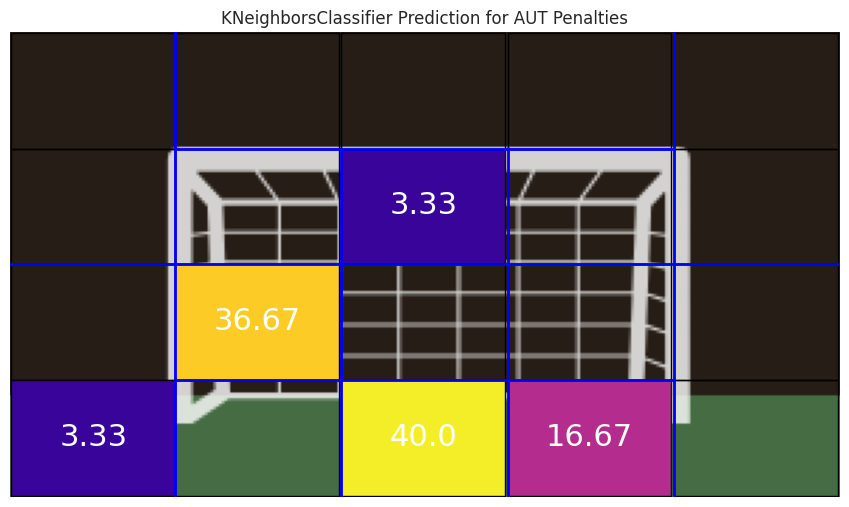

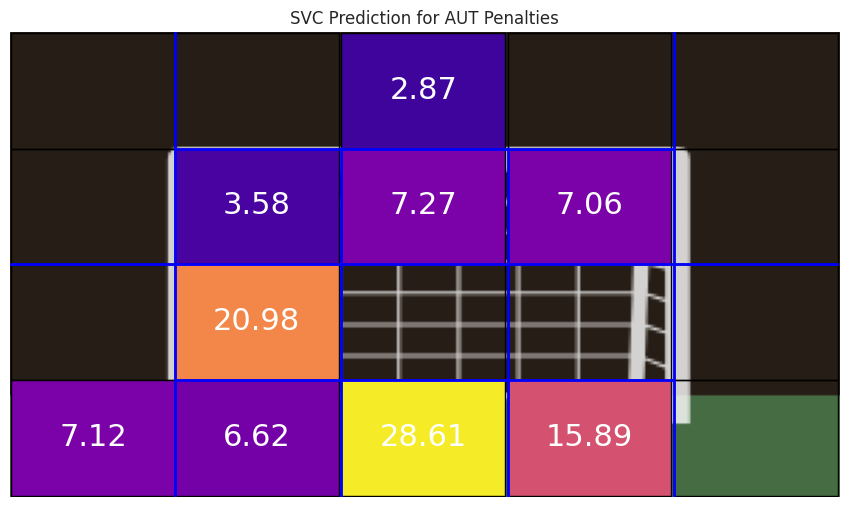

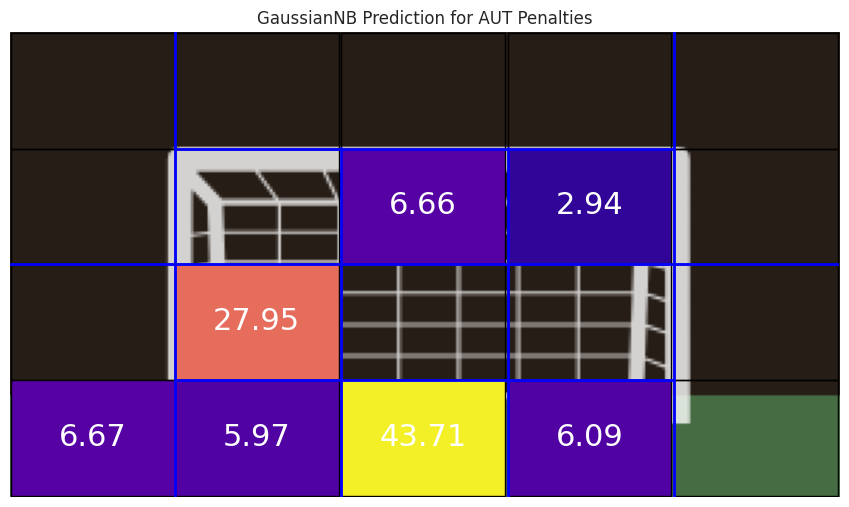

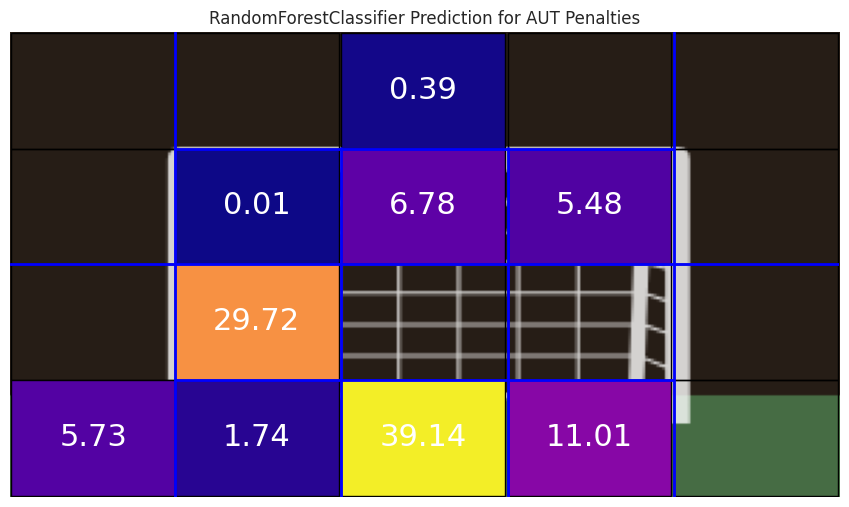

<ipython-input-410-56ed2b42de7a>:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(accuracy_list.keys()), y=list(accuracy_list.values()),palette='Spectral')


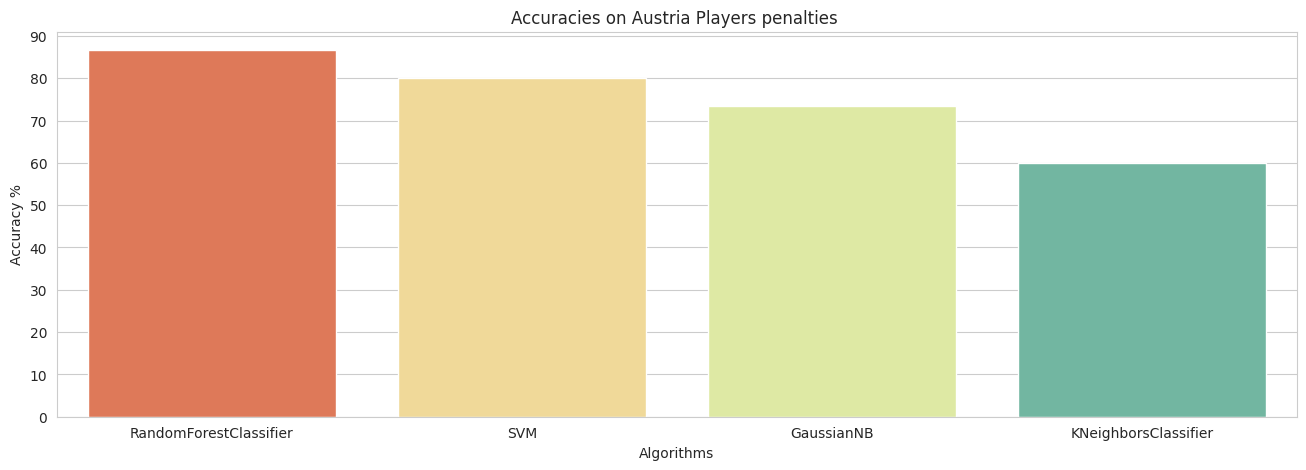

{'RandomForestClassifier': 86.66666666666667, 'SVM': 80.0, 'GaussianNB': 73.33333333333333, 'KNeighborsClassifier': 60.0}


In [ ]:
accuracies_on_data = test_models(nation='AUT') # Test Model on nation Austria
sorted_accuracies = dict(sorted(accuracies_on_data.items(), key=lambda x: x[1], reverse=True)) # Sorting in ascending order the accuracies of models
title = 'Accuracies on Austria Players penalties '
plot_accuracies(sorted_accuracies,title) # Plot accuracies
print(sorted_accuracies)


### Model Accuracies on Cristiano Ronaldo penalties


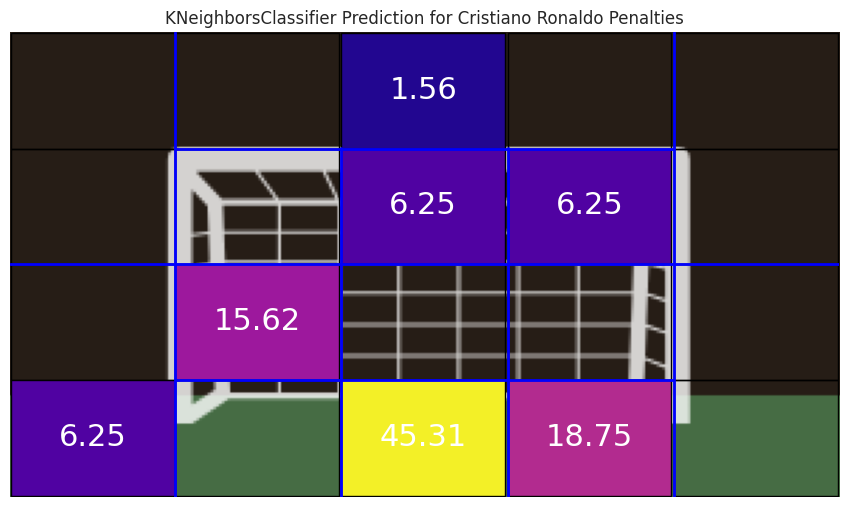

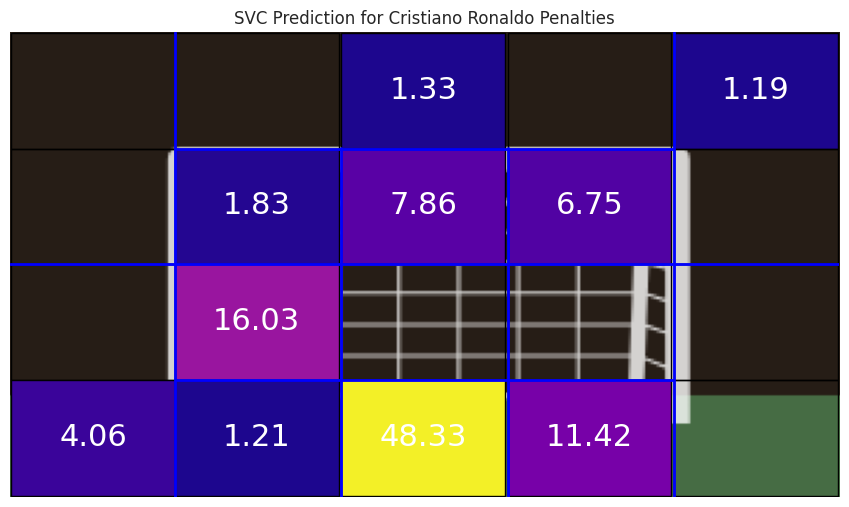

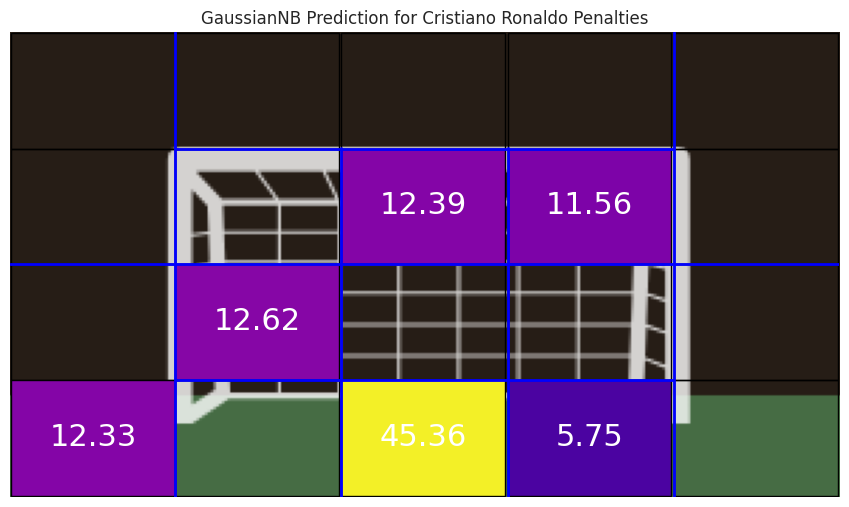

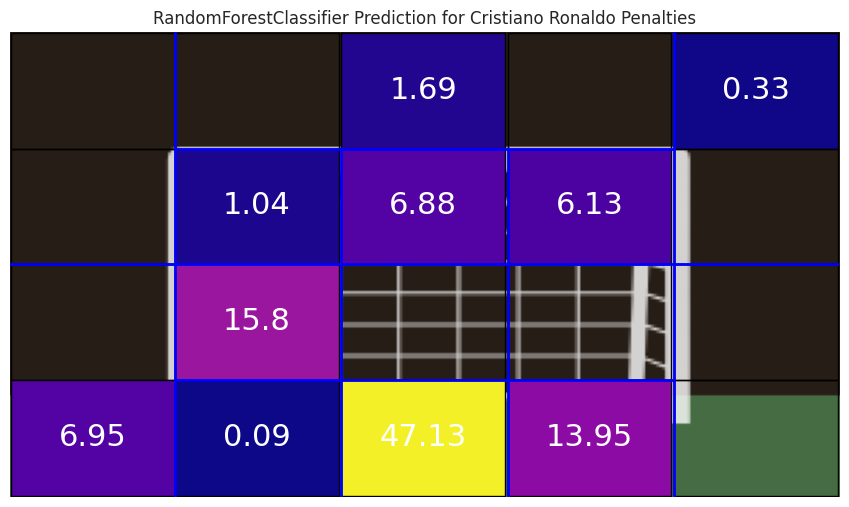

<ipython-input-410-56ed2b42de7a>:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(accuracy_list.keys()), y=list(accuracy_list.values()),palette='Spectral')


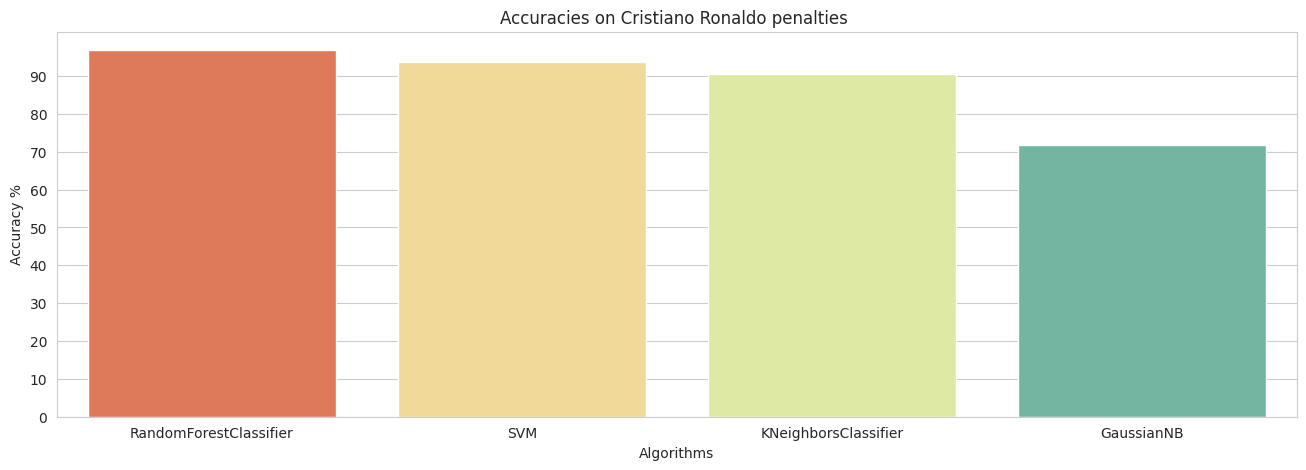

{'RandomForestClassifier': 96.875, 'SVM': 93.75, 'KNeighborsClassifier': 90.625, 'GaussianNB': 71.875}


In [ ]:
accuracies_on_data = test_models(player_name='Cristiano Ronaldo') # Test Model on player Cristiano Ronaldo
sorted_accuracies = dict(sorted(accuracies_on_data.items(), key=lambda x: x[1], reverse=True)) # Sorting in ascending order the accuracies of models
title = 'Accuracies on Cristiano Ronaldo penalties '
plot_accuracies(sorted_accuracies,title) # Plot accuracies
print(sorted_accuracies)

### KMeans Clustering for clustering zone of penalty based on given X and Y

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


      Cluster  Zone
1           0     1
2          10     7
3          12     2
4           5     1
6          12     1
...       ...   ...
3173        2     7
3176        1     3
3177        5     1
3178        0     1
3179       10     2

[2913 rows x 2 columns]


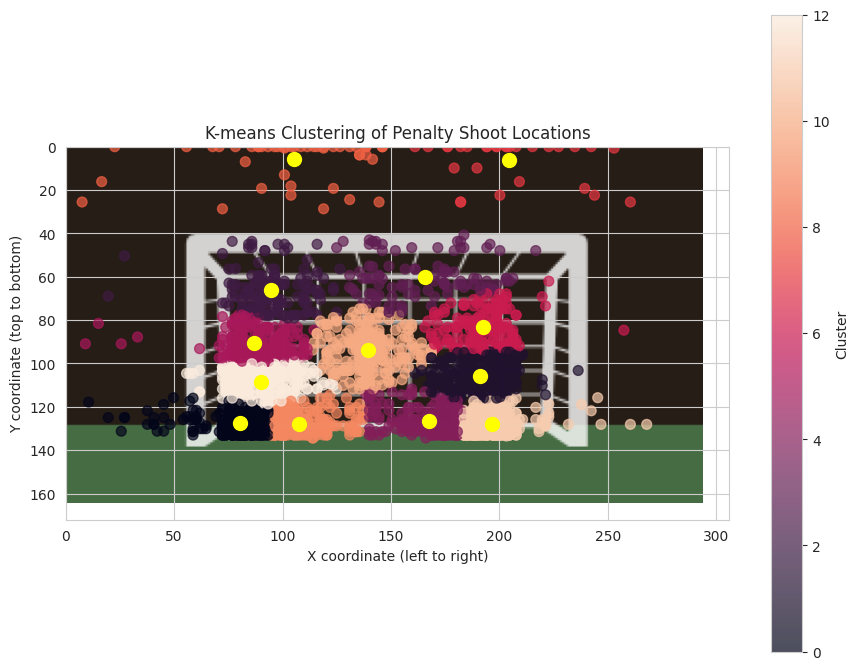

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from matplotlib import rcParams
import cv2

def k_n_cluster_plot(df_filtered, clusters, centroids):
    goal_width = 306
    goal_height = 172
    # Scale the points for right displaying
    x_scale = 2.8
    y_scale = 1.34375

    # Scale data
    df_filtered['scaled_x'] = df_filtered['X'] * x_scale
    df_filtered['scaled_y'] = df_filtered['Y'] * y_scale

    # Scale centroids
    centroids_scaled = centroids.copy()
    centroids_scaled[:, 0] *= x_scale
    centroids_scaled[:, 1] *= y_scale

    # Create a figure and axes for plotting
    fig, ax = plt.subplots()
    image = cv2.imread('Goal.png')
    ax.imshow(image)

    # Plot the clusters
    scatter = ax.scatter(df_filtered['scaled_x'], df_filtered['scaled_y'], c=clusters, cmap='rocket', s=50, alpha=0.7)
    plt.title('K-means Clustering of Penalty Shoot Locations')
    plt.xlabel('X coordinate (left to right)')
    plt.ylabel('Y coordinate (top to bottom)')
    plt.colorbar(scatter, label='Cluster')

    # Adjust limits to match image dimensions
    plt.xlim(0, goal_width)
    plt.ylim(0, goal_height)

    # Invert Y-axis to match image coordinates (top to bottom)
    plt.gca().invert_yaxis()

    # Plot centroids
    ax.scatter(centroids_scaled[:, 0], centroids_scaled[:, 1], s=100, c='yellow', label='Centroids')

    # Set plot size
    rcParams['figure.figsize'] = 10.7, 8.27

    plt.show()

def k_n_cluster(df, nation=None, player_name=None):
    df_filtered = df.copy()
    if nation:
        df_filtered = df[df['Nationality'] == nation].copy()  # Make a copy of DataFrame with given nation
    else:
        df_filtered = df.copy()  # If nation is not provided, use the entire DataFrame

    if player_name:
        df_filtered = df_filtered[df_filtered['Player Name'] == player_name].copy()  # Make a copy of DataFrame with given player name

    if df_filtered.empty:
        return "No data available for the given input."  # Return if no data matches the input

    X = df_filtered[['X', 'Y', 'Outcome']].values  # Get values from important features

    n_clusters = 13
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    clusters = kmeans.fit_predict(X)
    centroids = kmeans.cluster_centers_

    df_filtered['Cluster'] = clusters
    print(df_filtered[['Cluster', 'Zone']])

    k_n_cluster_plot(df_filtered, clusters, centroids)


k_n_cluster(merged_df)